In [1]:
from PIL import Image
import imagehash
from pathlib import Path
from matplotlib.pyplot import imshow, figure, show

import numpy as np
from scipy.spatial.distance import hamming
from collections import deque
from pprint import pprint
%matplotlib inline

imgs = sorted(list(Path(r'/Volumes/ESD-USB/trashcam_images/20161116').glob('**/*.jpg')))

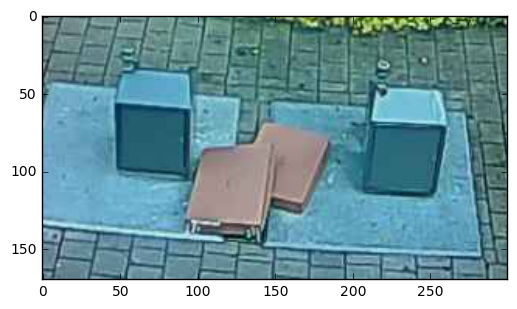

In [14]:
crop = (600,430,900,600)
#crop = (600,430,1050,600)
hash_size = 4

im = Image.open(imgs[23556],'r')
im = im.crop(crop)
imshow(np.asarray(im))

[1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1]
[1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1]


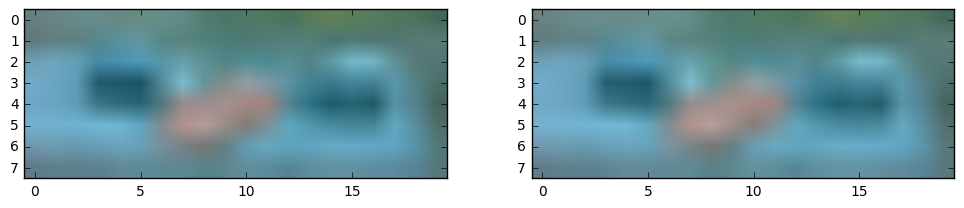

In [55]:
def get_hash(i):
    img = imgs[i]
    im = Image.open(img,'r')
    im = im.crop(crop)
    im = im.resize((20,8), Image.ANTIALIAS)
    return im, imagehash.average_hash(im,hash_size=hash_size).hash.flatten()

im1, h1 = get_hash(23556)
im2, h2 = get_hash(23558)
# im2, h2 = get_hash(23656)
print(h1+0)
print(h2+0)

fig = figure(figsize=(12,18))
a=fig.add_subplot(1,2,1)
imshow(np.asarray(im1))
a=fig.add_subplot(1,2,2)
imshow(np.asarray(im2))
show()

In [56]:
np.max(abs(np.asarray(im2,dtype=int)-np.asarray(im1,dtype=int)))

6

In [59]:
def get_small(i):
    img = imgs[i]
    im = Image.open(img,'r')
    im = im.crop(crop)
    return np.asarray(im.resize((20,8), Image.ANTIALIAS)).flatten()

In [68]:
def get_median_im(k):
    ims = []
    for i in range(k,k+5):
        ims.append(get_small(i))
    combined = np.array(ims)
    return np.median(combined,axis=0)


In [78]:
for k in range(23530,23530+80):
    print(k, np.percentile(np.abs(get_median_im(k)-get_median_im(k+10)),95))

23530 11.0
23531 11.0
23532 11.0
23533 11.0
23534 10.0
23535 10.0
23536 10.0
23537 9.0
23538 7.0
23539 6.0
23540 6.0
23541 6.0
23542 6.0
23543 6.0
23544 7.0
23545 8.0
23546 8.0
23547 8.0
23548 9.0
23549 10.0
23550 16.05
23551 19.2
23552 23.2
23553 24.25
23554 35.05
23555 33.0
23556 36.0
23557 34.05
23558 32.1
23559 26.0
23560 17.05
23561 19.05
23562 24.05
23563 24.05
23564 20.05
23565 14.05
23566 15.0
23567 17.05
23568 23.0
23569 71.0
23570 70.0
23571 68.05
23572 68.0
23573 67.0
23574 66.05
23575 62.0
23576 46.0
23577 44.0
23578 32.0
23579 25.0
23580 52.0
23581 61.0
23582 64.0
23583 65.0
23584 65.0
23585 60.0
23586 45.0
23587 42.0
23588 41.0
23589 39.0
23590 15.0
23591 10.0
23592 10.05
23593 44.0
23594 81.0
23595 89.0
23596 89.0
23597 89.05
23598 88.05
23599 88.0
23600 83.05
23601 82.0
23602 66.05
23603 34.0
23604 12.0
23605 22.0
23606 23.05
23607 29.0
23608 42.0
23609 47.0


In [ ]:
(np.asarray(im2)-np.asarray(im1))[1,:,:]

In [38]:
diff = np.asarray(im1) - np.asarray(im2)  # elementwise for scipy arrays
m_norm = diff  # Manhattan norm
m_norm

array([[[  3,  13,  16],
        [249,   4,   9],
        [  0,   9,  15],
        [ 11,  19,  21],
        [ 19,  21,  23],
        [ 17,  24,  22],
        [ 19,  25,  26],
        [ 16,  24,  24],
        [ 13,  22,  20],
        [ 12,  22,  17],
        [ 16,  21,  21],
        [ 12,  23,  20],
        [ 12,  20,  17],
        [ 18,  23,  15],
        [ 17,  26,  16],
        [ 17,  23,  19],
        [ 17,  24,  21],
        [ 16,  23,  21],
        [ 17,  23,  20],
        [ 17,  19,  19]],

       [[ 15,  23,  21],
        [ 13,  21,  22],
        [ 11,  16,  22],
        [  5,  18,  18],
        [ 11,  19,  23],
        [ 12,  23,  22],
        [ 11,  19,  19],
        [ 17,  25,  24],
        [ 10,  25,  24],
        [  8,  24,  18],
        [ 12,  21,  21],
        [ 18,  25,  25],
        [ 16,  25,  23],
        [ 14,  25,  20],
        [ 13,  22,  20],
        [ 17,  22,  25],
        [ 19,  23,  26],
        [ 19,  23,  23],
        [ 21,  24,  24],
        [ 21,  25,  24]

23490 /Volumes/ESD-USB/trashcam_images/20161116/12/5619.jpg


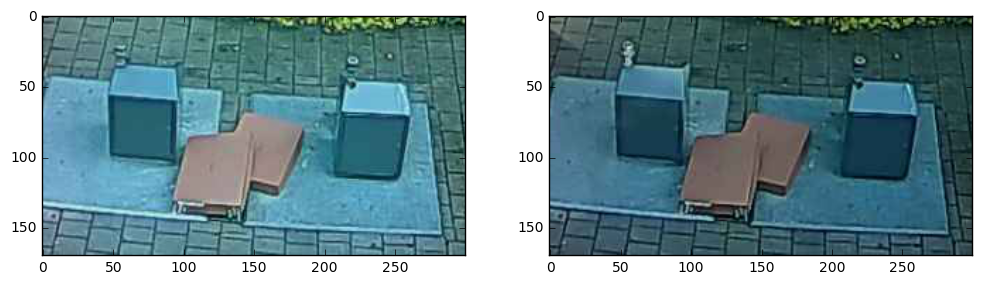

23616 /Volumes/ESD-USB/trashcam_images/20161116/13/0002.jpg


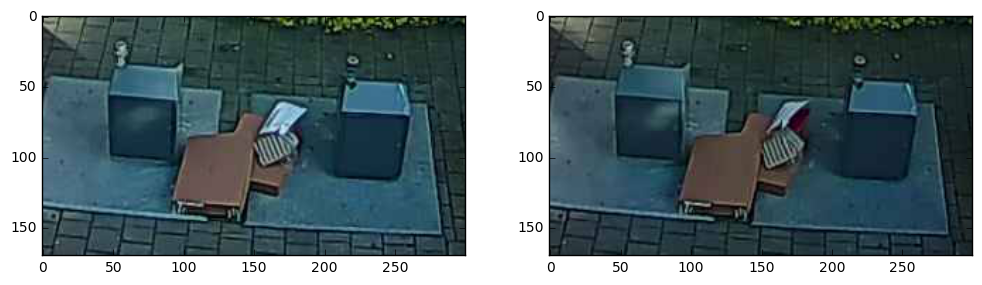

23640 /Volumes/ESD-USB/trashcam_images/20161116/13/0042.jpg


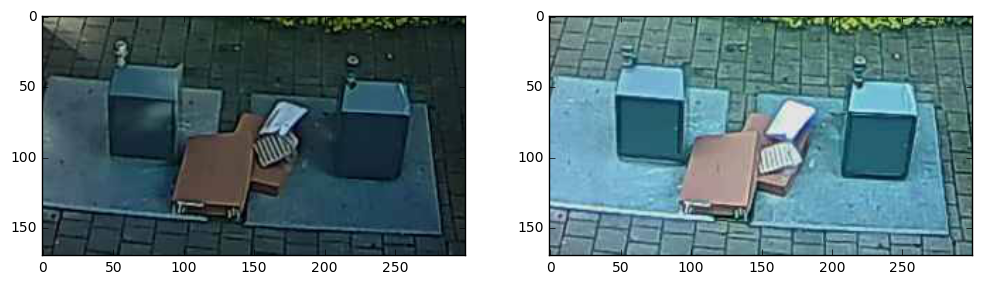

23856 /Volumes/ESD-USB/trashcam_images/20161116/13/0718.jpg


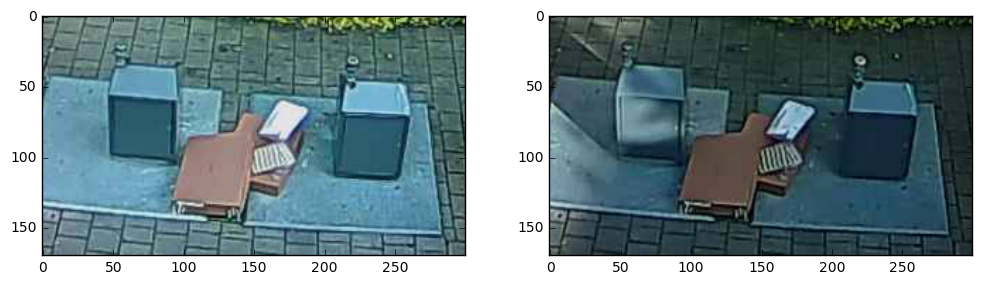

23910 /Volumes/ESD-USB/trashcam_images/20161116/13/0901.jpg


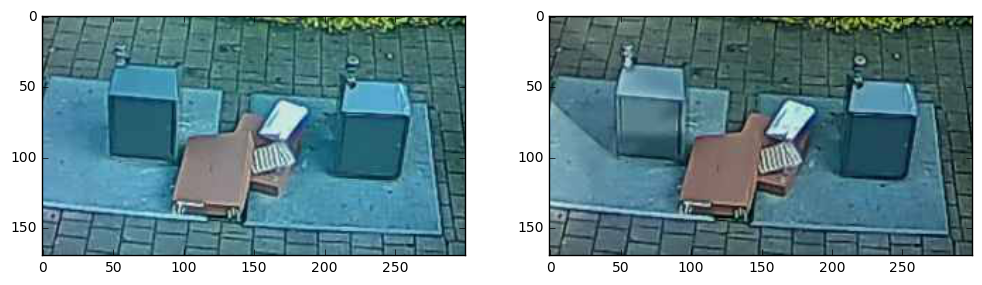

23913 /Volumes/ESD-USB/trashcam_images/20161116/13/0904.jpg


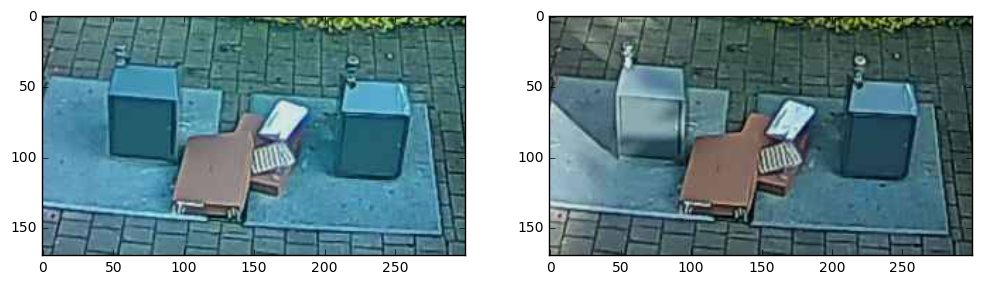

23916 /Volumes/ESD-USB/trashcam_images/20161116/13/0907.jpg


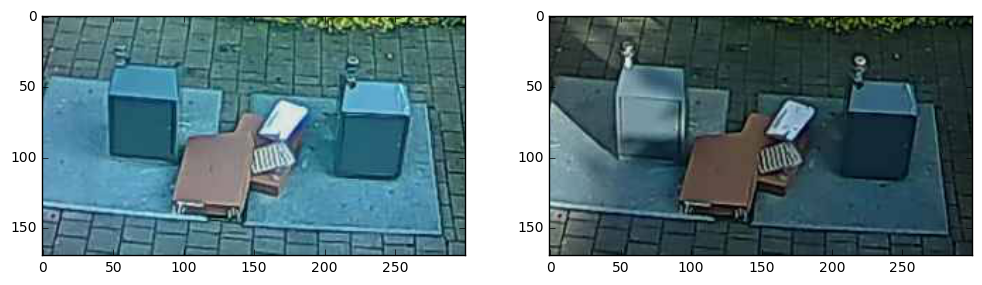

23919 /Volumes/ESD-USB/trashcam_images/20161116/13/0911.jpg


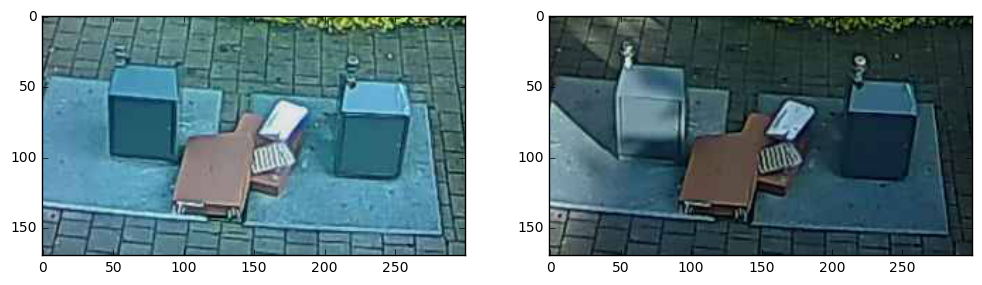

23970 /Volumes/ESD-USB/trashcam_images/20161116/13/1035.jpg


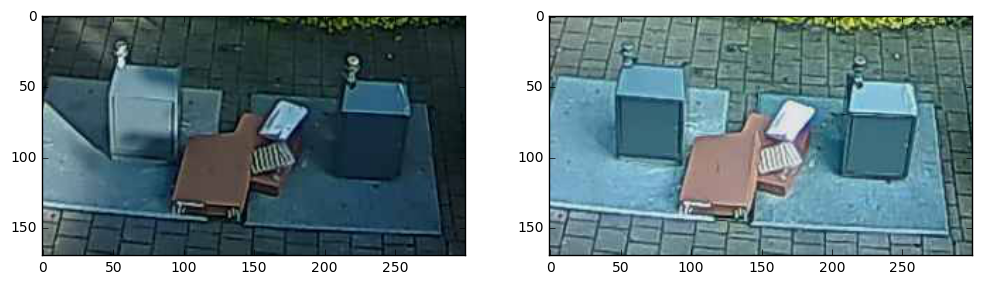

23991 /Volumes/ESD-USB/trashcam_images/20161116/13/1106.jpg


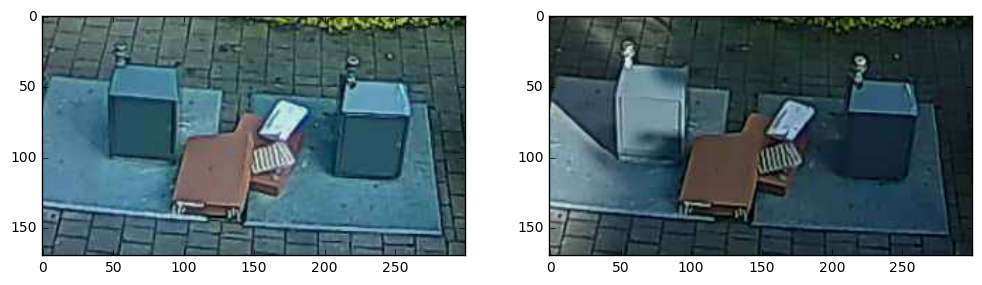

23994 /Volumes/ESD-USB/trashcam_images/20161116/13/1110.jpg


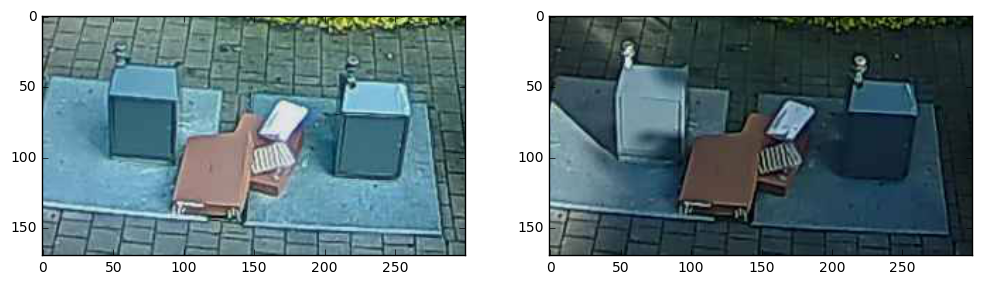

23997 /Volumes/ESD-USB/trashcam_images/20161116/13/1115.jpg


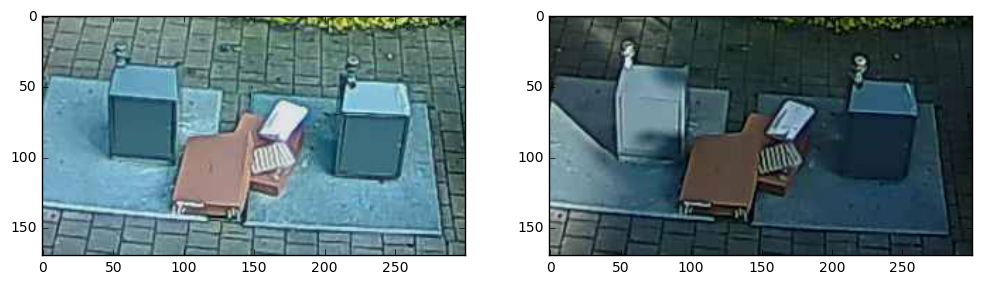

24012 /Volumes/ESD-USB/trashcam_images/20161116/13/1133.jpg


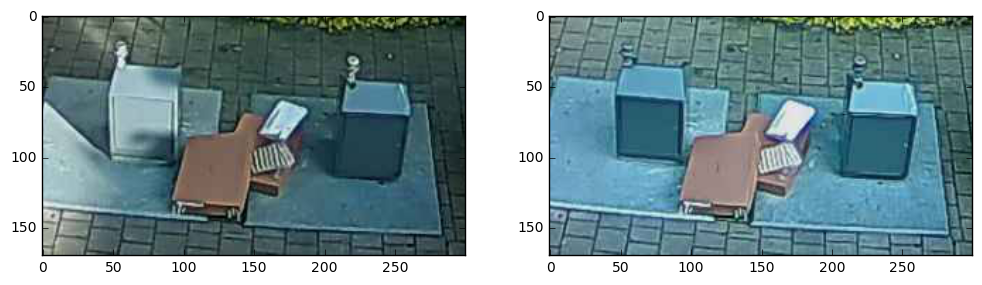

24015 /Volumes/ESD-USB/trashcam_images/20161116/13/1136.jpg


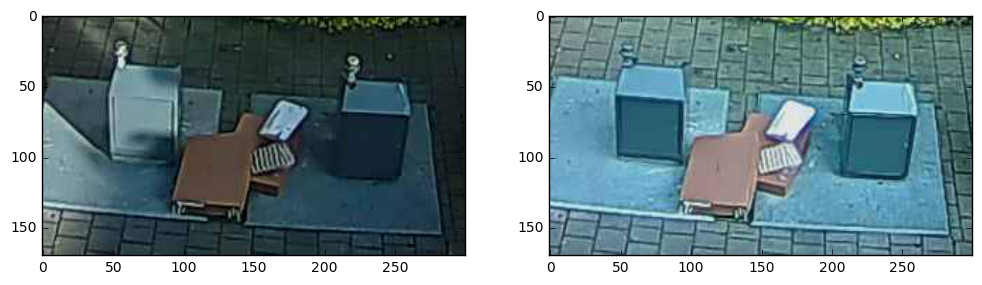

24018 /Volumes/ESD-USB/trashcam_images/20161116/13/1140.jpg


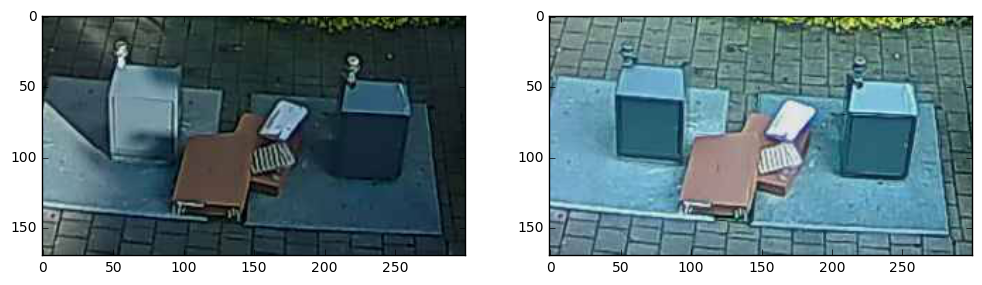

24078 /Volumes/ESD-USB/trashcam_images/20161116/13/1308.jpg


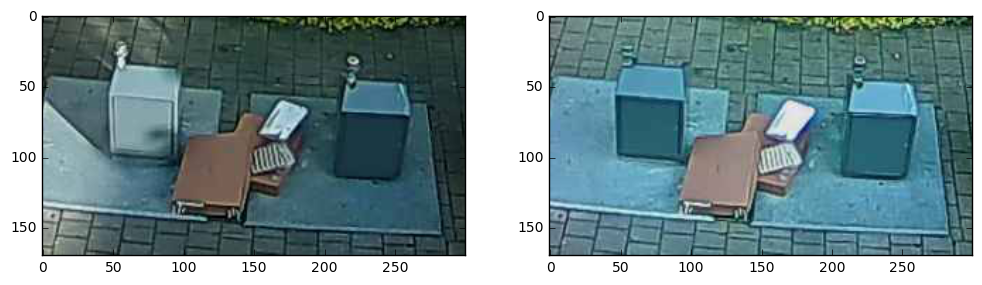

24081 /Volumes/ESD-USB/trashcam_images/20161116/13/1313.jpg


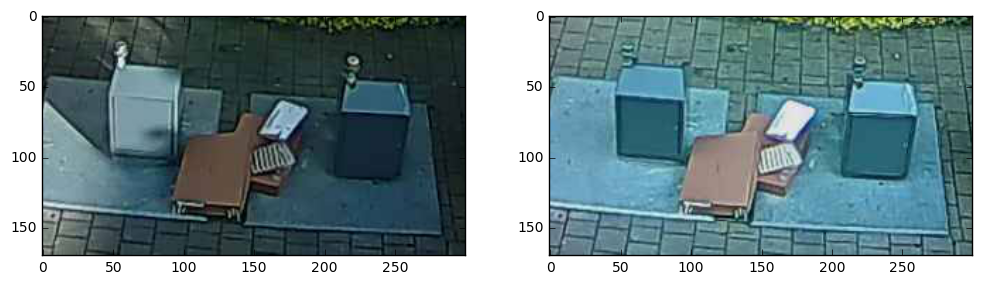

24129 /Volumes/ESD-USB/trashcam_images/20161116/13/1427.jpg


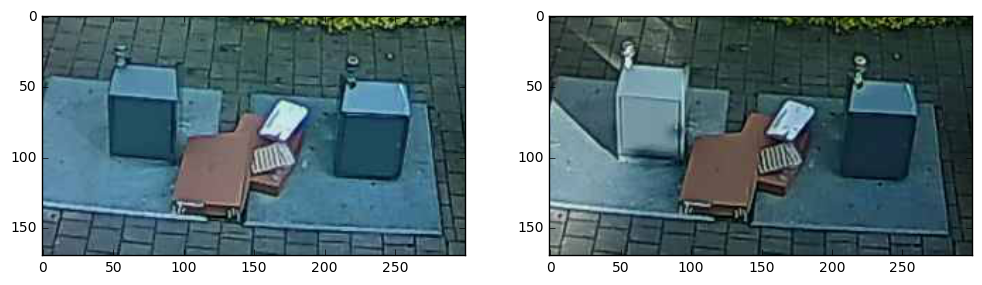

24186 /Volumes/ESD-USB/trashcam_images/20161116/13/1600.jpg


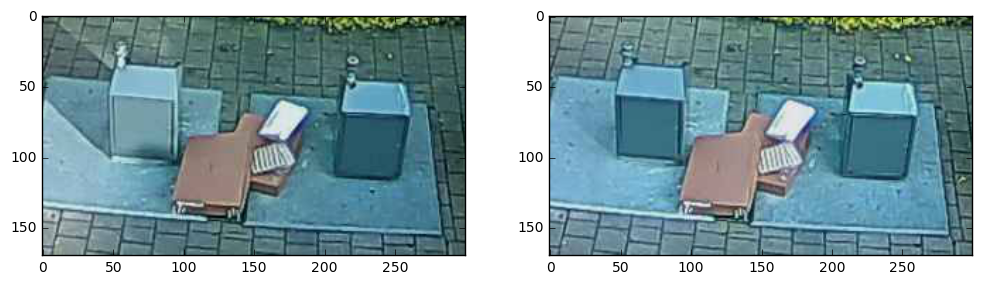

24225 /Volumes/ESD-USB/trashcam_images/20161116/13/1647.jpg


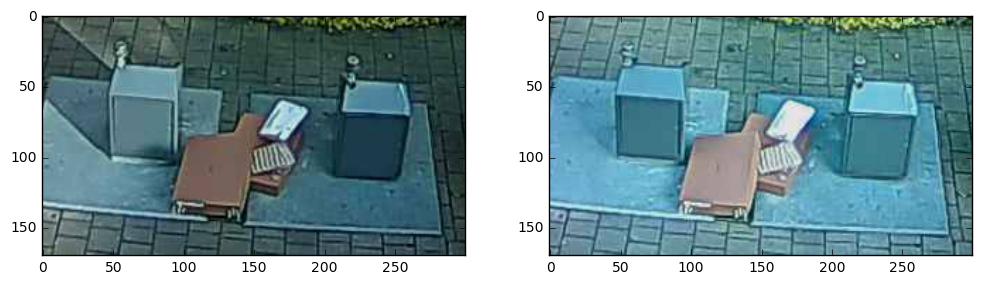

24291 /Volumes/ESD-USB/trashcam_images/20161116/13/1828.jpg


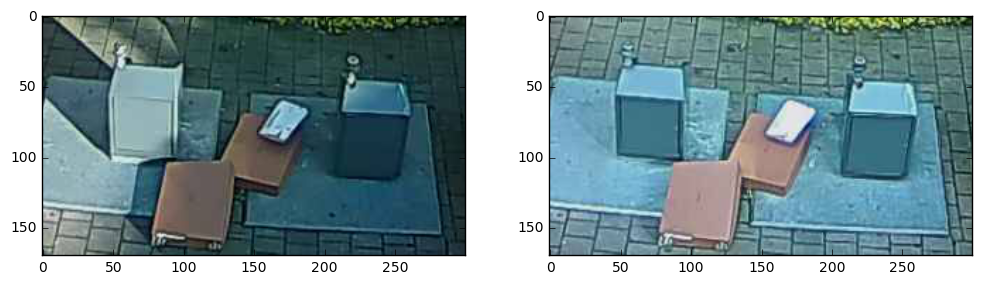

24315 /Volumes/ESD-USB/trashcam_images/20161116/13/1915.jpg


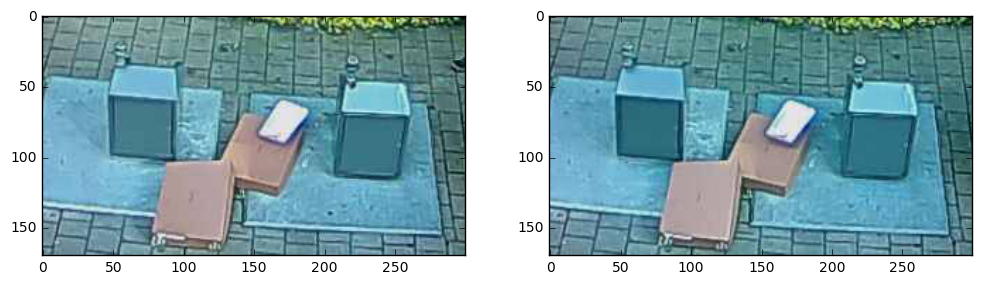

24357 /Volumes/ESD-USB/trashcam_images/20161116/13/2034.jpg


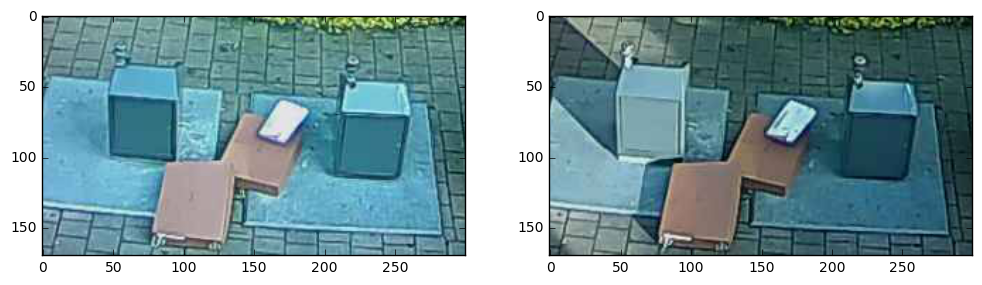

24360 /Volumes/ESD-USB/trashcam_images/20161116/13/2038.jpg


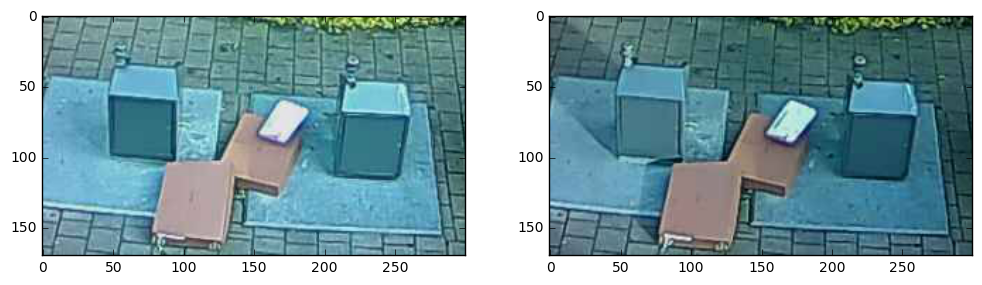

KeyboardInterrupt: 

In [7]:
n=0
last10 = deque(maxlen=12)
for i in range(23400,len(imgs),3):
    img = imgs[i]
    im = Image.open(img,'r')
    im = im.crop(crop)
    im_hash = imagehash.average_hash(im,hash_size=hash_size).hash.flatten()
    last10.append((im,im_hash))
    if len(last10) < 10:
        continue
    a = (
        np.array(
        [int(hash_size*hash_size*hamming(last10[4][1],ref[1])) 
         for ref in list(last10)[0:1]]) <= 1).all()
    
    b = (
        np.array(
        [int(hash_size*hash_size*hamming(last10[4][1],ref[1])) 
         for ref in list(last10)[-4:]]) >= 3).all()
    if a and b:
        print(i, img)
        fig = figure(figsize=(12,18))
        a=fig.add_subplot(1,2,1)
        imshow(np.asarray(last10[0][0]))
        a=fig.add_subplot(1,2,2)
        imshow(np.asarray(last10[9][0]))
        n+=1
        show()


        